Initial centroids:
     x  y
13  4  4
32  8  0
23  6  3
                x         y
Cluster                    
0        3.615385  5.230769
1        8.000000  0.857143
2        7.000000  3.888889
No updates on clusters:  False
                x         y
Cluster                    
0        3.640000  5.440000
1        7.333333  0.888889
2        7.000000  4.125000
No updates on clusters:  False
                x         y
Cluster                    
0        3.565217  5.521739
1        6.727273  0.909091
2        7.125000  5.000000
No updates on clusters:  False
                x         y
Cluster                    
0        3.444444  5.888889
1        5.750000  1.187500
2        7.375000  6.500000
No updates on clusters:  False
                x         y
Cluster                    
0        3.538462  6.307692
1        5.476190  1.428571
2        6.500000  8.125000
No updates on clusters:  False
                x         y
Cluster                    
0        3.600000  6.300000
1    

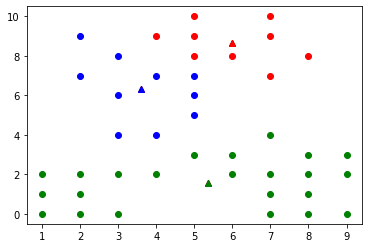

Initial centroids:
     x  y
11  3  6
17  5  6
28  7  4
                x         y
Cluster                    
0        2.466667  4.133333
1        5.909091  7.909091
2        6.937500  1.750000
No updates on clusters:  False
                x         y
Cluster                    
0        2.571429  2.571429
1        5.214286  8.214286
2        7.428571  1.857143
No updates on clusters:  False
                x         y
Cluster                    
0        2.583333  1.750000
1        4.882353  7.823529
2        7.615385  1.769231
No updates on clusters:  False
                x         y
Cluster                    
0        2.583333  1.750000
1        4.882353  7.823529
2        7.615385  1.769231
No updates on clusters:  True
Convergence! Final centroids:                 x         y
Cluster                    
0        2.583333  1.750000
1        4.882353  7.823529
2        7.615385  1.769231
Plotting...


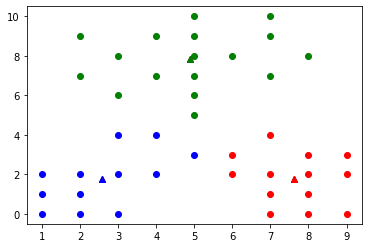

Initial centroids:
     x  y
10  3  4
7   2  9
12  3  8
                x         y
Cluster                    
0        5.107143  2.178571
1        2.000000  9.000000
2        5.230769  8.230769
No updates on clusters:  False
                x         y
Cluster                    
0        5.192308  1.884615
1        2.333333  8.000000
2        5.461538  8.000000
No updates on clusters:  False
                x         y
Cluster                    
0        5.200000  1.760000
1        2.500000  7.500000
2        5.615385  7.923077
No updates on clusters:  False
            x     y
Cluster            
0        5.20  1.76
1        2.80  7.40
2        5.75  8.00
No updates on clusters:  False
                x         y
Cluster                    
0        5.200000  1.760000
1        3.000000  7.666667
2        5.909091  7.909091
No updates on clusters:  False
                x         y
Cluster                    
0        5.200000  1.760000
1        3.000000  7.666667
2        5.909091

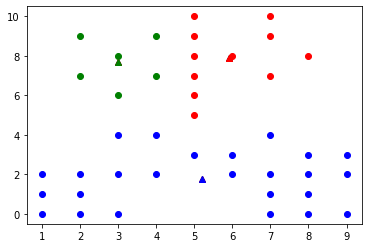

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

def k_means_clustering(data, centroids, k):
    centroid_current = centroids
    centroid_last = pd.DataFrame()
    clusters = pd.DataFrame()
    
    # iterate until convergence
    while not centroid_current.equals(centroid_last):
        
        cluster_count = 0 #it counts the number of clusters. Cluster IDs start from 0.
        # calculate the distance of each point to the K centroids
        for idx, position in centroid_current.iterrows():# the idx will not be used. We just separate the index with the actual data "position" in the dataset. You will use "cluster_count" as the column index in "clusters".
            # your code is here. Save the Euclidean distances into 'clusters'
            clusters[cluster_count]=((data[centroid_current.columns]-np.array(position)).pow(2).sum(1))**(1/2)
            # your code ends
            cluster_count += 1
        
        # update cluster, assign the points to clusters
        clusterIDs = []
        for row_idx in range(len(clusters)):
            # your code is here. Check the distances at every row in 'clusters'. Save the assigned cluster IDs to points. The IDs start from 0
            clusterIDs=clusters.idxmin(axis=1)
           # your code ends
        # assign points to clusters. The information is saved in the list and assigned to the dataset.
        data['Cluster'] = clusterIDs
        
        # store previous cluster
        centroid_last = centroid_current
        
        # Update the centroid of each cluster. All information are in 'data'. You have to calculate the new centroids based on the points in the same cluster.
        # The centroid is the center of a list of points. For example, (x1, y1), (x2, y2), ..., (xn, yn). The centroid is (x, y), where x = the mean of (x1, x2, ..., xn) and y = the mean of (y1, y2, ..., yn).
        centroids =[]
        points= [] # save k lists of points in the list. The points in the same list are in the same cluster. 
        # your code is here. The K centroids will be saved in 'centroids', e.g. [[1, 2], [3, 4], [5, 6]]
        centroids=data.groupby('Cluster').agg(np.mean)
        print(centroids)
        l1,l2,l3=[],[],[]
        for i in range(len(data)):
            x=data['x'][i]
            y=data['y'][i]
            if(data['Cluster'][i]==0):
                l1.append([x,y])
            elif(data['Cluster'][i]==1):
                l2.append([x,y])
            elif(data['Cluster'][i]==2):
                l3.append([x,y])
        points.append(l1)
        points.append(l2)
        points.append(l3)
        # your code ends
        centroid_current = pd.DataFrame(data=centroids, columns = ['x', 'y'])
         
        print("No updates on clusters: ", centroid_current.equals(centroid_last))

    print("Convergence! Final centroids:", centroid_current)
    # plotting
    print('Plotting...')
    colors= ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    # scatter plot all points. All points are colored circles
    for i in range(k):
        p = np.array(points[i])
        x, y = p[:,0], p[:, 1]
        
        plt.scatter(x, y, color = colors[i])
        plt.scatter(centroid_current['x'], centroid_current['y'], marker='^', color = colors[i])
    
    # scatter plot all centroids. All points are colored triangles
    for j in range(k):
        plt.scatter(centroid_current.iloc[j][0], centroid_current.iloc[j][1], marker='^', color= colors[j])
        
    plt.show()

if __name__ == '__main__':
    # Question 1 K-means clustering
    data = pd.read_csv('k_means_clustering_data.csv')
    seeds = []
    # Seed selection 1: random selected 3 points as centroids (4, 4), (8, 0), (6, 3)
    seeds.append(pd.DataFrame([[4, 4], [8, 0], [6, 3]], index=[13, 32, 23], columns = ['x', 'y']))
    
    # Seed selection 2: random selected 3 points as centroids (3, 6), (5, 6), (7, 4)
    seeds.append(pd.DataFrame([[3, 6], [5, 6], [7, 4]], index=[11, 17, 28], columns = ['x', 'y']))
    
    # Seed selection 3: random selected 3 points as centroids (3, 4), (2, 9), (3, 8)
    seeds.append(pd.DataFrame([[3, 4], [2, 9], [3, 8]], index=[10, 7, 12], columns = ['x', 'y']))
    
    for i in range(3):
      centroids = seeds[i]
      print('Initial centroids:\n', centroids)
      k_means_clustering(data, centroids, 3)


   

In [7]:
 # Question 2 Hidden Markov Model
    # your code is here

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

print("P(w3=R|w1=R,u2=F,u3=T)".translate(subscript))
print("P(w2=Rainy,w3=Rainy|w1=Rainy,u2=F,u3=T)".translate(subscript))
print("P(w2=Sunny,w3=Rainy|...".translate(subscript))
print("P(w2=Foggy,w3=Rainy|...".translate(subscript))

print("\n-------------------------------------------------------------------\n")

print("P(u3=T|w3=R)P(u2=F|w2=R)P(w3=R|w2=R)P(w2=R|w1=R)P(w1=R)  /  P(u3=T)P(u2=F)P(w1=R)".translate(subscript))
print("P(u3=T|w3=R)P(u2=F|w2=S)P(w3=R|w2=S)P(w2=S|w1=R)P(w1=R)  /  P(u3=T)P(u2=F)P(w1=R)".translate(subscript))
print("P(u3=T|w3=R)P(u2=F|w2=F)P(w3=R|w2=F)P(w2=F|w1=R)P(w1=R)  /  P(u3=T)P(u2=F)P(w1=R)".translate(subscript))

print("P(u3=T|w3=R)P(u2=F|w2=R)P(w3=R|w2=R)P(w2=R|w1=R)  /  P(u3=T)P(u2=F)".translate(subscript))
print("P(u3=T|w3=R)P(u2=F|w2=S)P(w3=R|w2=S)P(w2=S|w1=R)  /  P(u3=T)P(u2=F)".translate(subscript))
print("P(u3=T|w3=R)P(u2=F|w2=F)P(w3=R|w2=F)P(w2=F|w1=R)  /  P(u3=T)P(u2=F)".translate(subscript))


print("(0.8)(0.2)(0.6)(0.6)  /  (0.5)(0.5)")
print("(0.8)(0.9)(0.05)(0.2)  /  (0.5)(0.5)")
print("(0.8)(0.7)(0.3)(0.2)  /  (0.5)(0.5)") 
print(".3936")

    
    # your code ends

P(w₃=R|w₁=R,u₂=F,u₃=T)
P(w₂=Rainy,w₃=Rainy|w₁=Rainy,u₂=F,u₃=T)
P(w₂=Sunny,w₃=Rainy|...
P(w₂=Foggy,w₃=Rainy|...

-------------------------------------------------------------------

P(u₃=T|w₃=R)P(u₂=F|w₂=R)P(w₃=R|w₂=R)P(w₂=R|w₁=R)P(w₁=R)  /  P(u₃=T)P(u₂=F)P(w₁=R)
P(u₃=T|w₃=R)P(u₂=F|w₂=S)P(w₃=R|w₂=S)P(w₂=S|w₁=R)P(w₁=R)  /  P(u₃=T)P(u₂=F)P(w₁=R)
P(u₃=T|w₃=R)P(u₂=F|w₂=F)P(w₃=R|w₂=F)P(w₂=F|w₁=R)P(w₁=R)  /  P(u₃=T)P(u₂=F)P(w₁=R)
P(u₃=T|w₃=R)P(u₂=F|w₂=R)P(w₃=R|w₂=R)P(w₂=R|w₁=R)  /  P(u₃=T)P(u₂=F)
P(u₃=T|w₃=R)P(u₂=F|w₂=S)P(w₃=R|w₂=S)P(w₂=S|w₁=R)  /  P(u₃=T)P(u₂=F)
P(u₃=T|w₃=R)P(u₂=F|w₂=F)P(w₃=R|w₂=F)P(w₂=F|w₁=R)  /  P(u₃=T)P(u₂=F)
(0.8)(0.2)(0.6)(0.6)  /  (0.5)(0.5)
(0.8)(0.9)(0.05)(0.2)  /  (0.5)(0.5)
(0.8)(0.7)(0.3)(0.2)  /  (0.5)(0.5)
.3936
